In [100]:
import networkx as nx
import pandas as pd

In this notebook, I worked out how to create my 'best bus route' algorithm, which tells you how to get from node A to node B while maximizing the total number of potential commuters or commuter fare. Since this was essentially scrap paper, I don't have markup, but you can see the final outcome here in 'Longest_Path_Comparison_By_Year.ipynb'

In [101]:
data = {
    'Location': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E', 'E', 'F', 'F', 'G', 'G', 'H', 'H', 'D'],
    'Adjacent_Location': ['B', 'C', 'A', 'D', 'B', 'E', 'C', 'F', 'D', 'G', 'E', 'H', 'F', 'H', 'G', 'F', 'E'],
    'Distance': [10, 15, 10, 20, 15, 12, 20, 25, 12, 18, 20, 22, 18, 10, 22, 28, 10]
}

df = pd.DataFrame(data)


In [187]:
df

,Location,Adjacent_Location,Distance
0,A,B,10
1,A,C,15
2,B,A,10
3,B,D,20
4,C,B,15
5,C,E,12
6,D,C,20
7,D,F,25
8,E,D,12
9,E,G,18


In [102]:
G = nx.DiGraph()


In [103]:
for _, row in df.iterrows():
    G.add_edge(row['Location'], row['Adjacent_Location'], weight=row['Distance'])


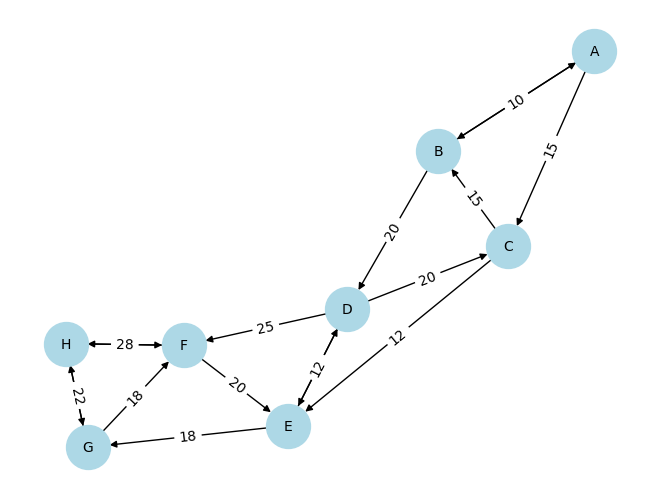

In [104]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)  # positions for all nodes

nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


In [105]:
T = nx.dfs_tree(G, source='A', depth_limit=2)

In [106]:
def print_paths(node, path=[]):
    path = path + [node]
    if len(path) > 1:
        print(' -> '.join(path))
    for neighbor in T.neighbors(node):
        print_paths(neighbor, path.copy())

# Start printing paths from source 'A'
print_paths('A')

A -> B
A -> B -> D
A -> C
A -> C -> E


In [107]:
# Perform DFS from source 'A' with depth limit 2
T = nx.dfs_tree(G, source='A', depth_limit=2)

# Function to recursively find all paths from a given node
def find_paths(node, path=[]):
    path = path + [node]
    if len(path) > 1:
        yield path
    for neighbor in T.neighbors(node):
        yield from find_paths(neighbor, path.copy())

# Get and print all paths from source 'A'
all_paths = list(find_paths('A'))
for path in all_paths:
    print(path)

['A', 'B']
['A', 'B', 'D']
['A', 'C']
['A', 'C', 'E']


In [108]:
# Perform DFS from source 'A' with depth limit 2
T = nx.dfs_tree(G, source='A')

# Function to recursively find all paths from a given node along with their combined weight
def find_paths_with_weights(node, path=[], weight=0):
    path = path + [node]
    if len(path) > 1:
        yield path, weight
    for neighbor in T.neighbors(node):
        edge_weight = G.get_edge_data(node, neighbor).get('weight', 0)
        yield from find_paths_with_weights(neighbor, path.copy(), weight + edge_weight)

# Get and print all paths from source 'A' with combined weights
all_paths_with_weights = list(find_paths_with_weights('A'))
for path, weight in all_paths_with_weights:
    print(f"Path: {path}, Combined Weight: {weight}")

Path: ['A', 'B'], Combined Weight: 10
Path: ['A', 'B', 'D'], Combined Weight: 30
Path: ['A', 'B', 'D', 'C'], Combined Weight: 50
Path: ['A', 'B', 'D', 'C', 'E'], Combined Weight: 62
Path: ['A', 'B', 'D', 'C', 'E', 'G'], Combined Weight: 80
Path: ['A', 'B', 'D', 'C', 'E', 'G', 'F'], Combined Weight: 98
Path: ['A', 'B', 'D', 'C', 'E', 'G', 'F', 'H'], Combined Weight: 120


In [109]:
paths = nx.all_simple_paths(G, source='A', target='G')
for path in map(nx.utils.pairwise, paths):
    print(list(path))


[('A', 'B'), ('B', 'D'), ('D', 'C'), ('C', 'E'), ('E', 'G')]
[('A', 'B'), ('B', 'D'), ('D', 'F'), ('F', 'E'), ('E', 'G')]
[('A', 'B'), ('B', 'D'), ('D', 'F'), ('F', 'H'), ('H', 'G')]
[('A', 'B'), ('B', 'D'), ('D', 'E'), ('E', 'G')]
[('A', 'C'), ('C', 'B'), ('B', 'D'), ('D', 'F'), ('F', 'E'), ('E', 'G')]
[('A', 'C'), ('C', 'B'), ('B', 'D'), ('D', 'F'), ('F', 'H'), ('H', 'G')]
[('A', 'C'), ('C', 'B'), ('B', 'D'), ('D', 'E'), ('E', 'G')]
[('A', 'C'), ('C', 'E'), ('E', 'D'), ('D', 'F'), ('F', 'H'), ('H', 'G')]
[('A', 'C'), ('C', 'E'), ('E', 'G')]


ALL SIMPLE PATHS!!!!!

In [110]:
for path in nx.all_simple_paths(G, source='A', target='G'):
    print(path)

['A', 'B', 'D', 'C', 'E', 'G']
['A', 'B', 'D', 'F', 'E', 'G']
['A', 'B', 'D', 'F', 'H', 'G']
['A', 'B', 'D', 'E', 'G']
['A', 'C', 'B', 'D', 'F', 'E', 'G']
['A', 'C', 'B', 'D', 'F', 'H', 'G']
['A', 'C', 'B', 'D', 'E', 'G']
['A', 'C', 'E', 'D', 'F', 'H', 'G']
['A', 'C', 'E', 'G']


In [111]:
path = ['A', 'B', 'D', 'E', 'G']
sum(G[path[i]][path[i+1]]['weight'] for i in range(len(path) - 1))


58

In [112]:
nx.path_weight(G, ['A', 'C', 'B', 'D', 'F', 'E', 'G'], weight = 'weight')

113

In [113]:
#AC - 15
#CB - 15
#BD - 20 
#DF - 25 
#FE - 20
#EG - 18

15+15+20+25+20+18

#seems to work

113

In [114]:
paths = []
weights = []

for path in nx.all_simple_paths(G, source='A', target='G'):
    new_weight = nx.path_weight(G, path, weight = 'weight')
    paths.append(path)
    weights.append(new_weight)



In [115]:
paths_DF = pd.DataFrame({'paths':paths, 'Weights':weights})

In [116]:
my_list = ['A', 'B', 'D', 'F', 'E', 'G']	

for i in range(len(my_list)):
    for j in range(i + 1, len(my_list)):
        print([my_list[i], my_list[j]])
#here are the additional path weights

['A', 'B']
['A', 'D']
['A', 'F']
['A', 'E']
['A', 'G']
['B', 'D']
['B', 'F']
['B', 'E']
['B', 'G']
['D', 'F']
['D', 'E']
['D', 'G']
['F', 'E']
['F', 'G']
['E', 'G']


In [146]:
result_list = []
path_combo_list = []

for path in paths_DF['paths']:
    path_combinations = []
    for i in range(len(path)):
        for j in range(i + 1, len(path)):
            path_combinations.append(f'[{path[i]},{path[j]}]')
    result_list.append(path_combinations)

# Print the result_list or perform further processing
for path_combinations in result_list:
    path_combo_list.append(path_combinations)


In [147]:
path_combo_list

[['[A,B]',
  '[A,D]',
  '[A,C]',
  '[A,E]',
  '[A,G]',
  '[B,D]',
  '[B,C]',
  '[B,E]',
  '[B,G]',
  '[D,C]',
  '[D,E]',
  '[D,G]',
  '[C,E]',
  '[C,G]',
  '[E,G]'],
 ['[A,B]',
  '[A,D]',
  '[A,F]',
  '[A,E]',
  '[A,G]',
  '[B,D]',
  '[B,F]',
  '[B,E]',
  '[B,G]',
  '[D,F]',
  '[D,E]',
  '[D,G]',
  '[F,E]',
  '[F,G]',
  '[E,G]'],
 ['[A,B]',
  '[A,D]',
  '[A,F]',
  '[A,H]',
  '[A,G]',
  '[B,D]',
  '[B,F]',
  '[B,H]',
  '[B,G]',
  '[D,F]',
  '[D,H]',
  '[D,G]',
  '[F,H]',
  '[F,G]',
  '[H,G]'],
 ['[A,B]',
  '[A,D]',
  '[A,E]',
  '[A,G]',
  '[B,D]',
  '[B,E]',
  '[B,G]',
  '[D,E]',
  '[D,G]',
  '[E,G]'],
 ['[A,C]',
  '[A,B]',
  '[A,D]',
  '[A,F]',
  '[A,E]',
  '[A,G]',
  '[C,B]',
  '[C,D]',
  '[C,F]',
  '[C,E]',
  '[C,G]',
  '[B,D]',
  '[B,F]',
  '[B,E]',
  '[B,G]',
  '[D,F]',
  '[D,E]',
  '[D,G]',
  '[F,E]',
  '[F,G]',
  '[E,G]'],
 ['[A,C]',
  '[A,B]',
  '[A,D]',
  '[A,F]',
  '[A,H]',
  '[A,G]',
  '[C,B]',
  '[C,D]',
  '[C,F]',
  '[C,H]',
  '[C,G]',
  '[B,D]',
  '[B,F]',
  '[B,H]',
  '[B

In [186]:
pd.DataFrame({'paths':paths, 'Weights':weights, 'path_combo_list': path_combo_list})

,paths,Weights,path_combo_list
0,"[A, B, D, C, E, G]",80,"[[A,B], [A,D], [A,C], [A,E], [A,G], [B,D], [B,..."
1,"[A, B, D, F, E, G]",93,"[[A,B], [A,D], [A,F], [A,E], [A,G], [B,D], [B,..."
2,"[A, B, D, F, H, G]",99,"[[A,B], [A,D], [A,F], [A,H], [A,G], [B,D], [B,..."
3,"[A, B, D, E, G]",58,"[[A,B], [A,D], [A,E], [A,G], [B,D], [B,E], [B,..."
4,"[A, C, B, D, F, E, G]",113,"[[A,C], [A,B], [A,D], [A,F], [A,E], [A,G], [C,..."
5,"[A, C, B, D, F, H, G]",119,"[[A,C], [A,B], [A,D], [A,F], [A,H], [A,G], [C,..."
6,"[A, C, B, D, E, G]",78,"[[A,C], [A,B], [A,D], [A,E], [A,G], [C,B], [C,..."
7,"[A, C, E, D, F, H, G]",108,"[[A,C], [A,E], [A,D], [A,F], [A,H], [A,G], [C,..."
8,"[A, C, E, G]",45,"[[A,C], [A,E], [A,G], [C,E], [C,G], [E,G]]"


In [177]:
result_dict = {}

for loc, adj_loc, dist in zip(data['Location'], data['Adjacent_Location'], data['Distance']):
    key = f'[{loc},{adj_loc}]'
    result_dict[key] = dist

result_dict

{'[A,B]': 10,
 '[A,C]': 15,
 '[B,A]': 10,
 '[B,D]': 20,
 '[C,B]': 15,
 '[C,E]': 12,
 '[D,C]': 20,
 '[D,F]': 25,
 '[E,D]': 12,
 '[E,G]': 18,
 '[F,E]': 20,
 '[F,H]': 22,
 '[G,F]': 18,
 '[G,H]': 10,
 '[H,G]': 22,
 '[H,F]': 28,
 '[D,E]': 10}

In [149]:
path_combo_list[0]

['[A,B]',
 '[A,D]',
 '[A,C]',
 '[A,E]',
 '[A,G]',
 '[B,D]',
 '[B,C]',
 '[B,E]',
 '[B,G]',
 '[D,C]',
 '[D,E]',
 '[D,G]',
 '[C,E]',
 '[C,G]',
 '[E,G]']

In [165]:
result_dict[input_list[0]]

10

In [185]:
for two_list in input_list:
    key_tuple = tuple(two_list)
    value = result_dict[key_tuple]
    if value is not None:
        print(f'Key: {key_tuple}, Value: {value}')
    else:
        print(f'Key: {key_tuple} not found in the dictionary.')



KeyError: ('[', 'A', ',', 'B', ']')

In [182]:
result_dict = {}

for loc, adj_loc, dist in zip(data['Location'], data['Adjacent_Location'], data['Distance']):
    key = (loc, adj_loc)  # Using a tuple as the key
    result_dict[key] = dist

print(result_dict)


{('A', 'B'): 10, ('A', 'C'): 15, ('B', 'A'): 10, ('B', 'D'): 20, ('C', 'B'): 15, ('C', 'E'): 12, ('D', 'C'): 20, ('D', 'F'): 25, ('E', 'D'): 12, ('E', 'G'): 18, ('F', 'E'): 20, ('F', 'H'): 22, ('G', 'F'): 18, ('G', 'H'): 10, ('H', 'G'): 22, ('H', 'F'): 28, ('D', 'E'): 10}
